# Malaysian Twitter User Engagement for Lalitha Sdn Bhd

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv file
df = pd.read_csv('social_media_data.csv')

In [3]:
# view the first five
df.head()

,User ID,Frequency of Posts,Post Type,Likes,Comments,Retweets,Sentiment of Post,Sentiment of Comments,Date of Post,Number of Followers,Engagement
0,8270,29,Image,34,26,32,Neutral,Negative,2023-11-13 13:32:18,3480,92
1,1860,23,Image,339,168,178,Negative,Neutral,2023-11-21 08:30:00,1380,685
2,6390,7,Image,230,42,14,Negative,Neutral,2023-11-01 19:23:32,595,369
3,6191,3,Image,438,114,117,Positive,Positive,2023-11-06 03:57:52,303,669
4,6734,10,No Image,229,58,26,Neutral,Neutral,2023-11-05 22:41:26,800,406


In [4]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User ID                1000 non-null   int64 
 1   Frequency of Posts     1000 non-null   int64 
 2   Post Type              1000 non-null   object
 3   Likes                  1000 non-null   int64 
 4   Comments               1000 non-null   int64 
 5   Retweets               1000 non-null   int64 
 6   Sentiment of Post      1000 non-null   object
 7   Sentiment of Comments  1000 non-null   object
 8   Date of Post           1000 non-null   object
 9   Number of Followers    1000 non-null   int64 
 10  Engagement             1000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 86.1+ KB


In [5]:
# Statistical Description
df.describe(include='all')

,User ID,Frequency of Posts,Post Type,Likes,Comments,Retweets,Sentiment of Post,Sentiment of Comments,Date of Post,Number of Followers,Engagement
count,1000.00000,1000.00000,1000,1000.00000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000
unique,NaN,NaN,2,NaN,NaN,NaN,3,3,1000,NaN,NaN
top,NaN,NaN,No Image,NaN,NaN,NaN,Neutral,Negative,2023-11-13 13:32:18,NaN,NaN
freq,NaN,NaN,513,NaN,NaN,NaN,349,337,1,NaN,NaN
mean,5594.25600,15.09700,NaN,312.47300,122.982000,78.394000,NaN,NaN,NaN,1494.98400,551.614000
std,2533.55383,8.44683,NaN,190.64476,75.646018,54.183361,NaN,NaN,NaN,970.69703,245.557157
min,1004.00000,1.00000,NaN,0.00000,0.000000,0.000000,NaN,NaN,NaN,64.00000,48.000000
25%,3467.50000,8.00000,NaN,154.75000,61.000000,37.000000,NaN,NaN,NaN,701.50000,368.750000
50%,5750.00000,15.00000,NaN,301.00000,117.000000,70.000000,NaN,NaN,NaN,1362.00000,522.000000
75%,7806.75000,23.00000,NaN,443.25000,178.000000,108.000000,NaN,NaN,NaN,2142.75000,708.250000


## Visualization for Hypothesis 1

"Posts made during evening hours receive higher engagement compared to posts made at other times of the day."

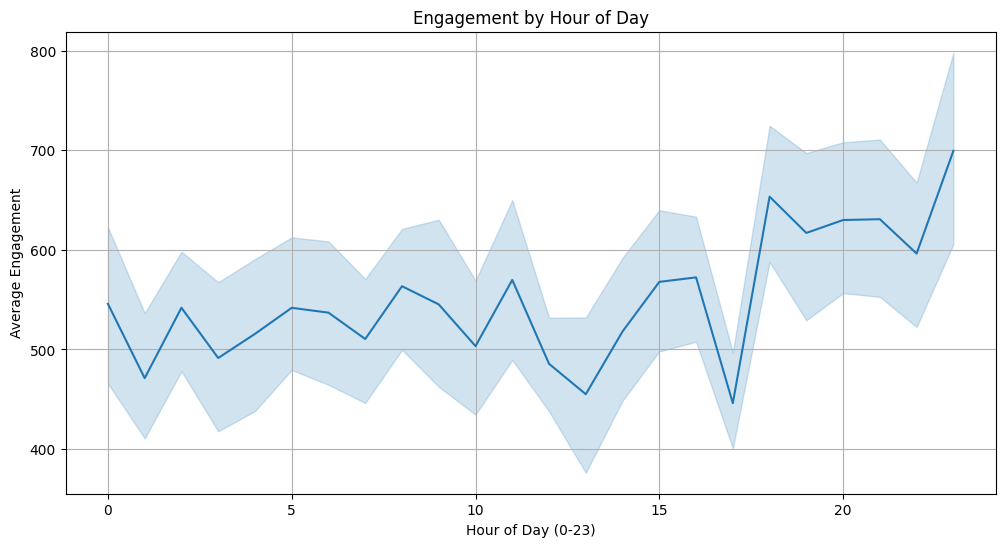

In [6]:
# Ensure 'Date of Post' is in datetime format
df['Date of Post'] = pd.to_datetime(df['Date of Post'])

# Extracting hour from the 'Date of Post' for visualization
df['Hour of Post'] = df['Date of Post'].dt.hour

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour of Post', y='Engagement', data=df)
plt.title('Engagement by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Engagement')
plt.grid(True)



## Visualization for Hypothesis 2

These bar graphs compare the average engagement metrics (likes, comments, shares) for posts with images and posts without images.

"Social media posts that include images will receive higher engagement metrics (likes, comments, and shares) compared to posts without images."

This hypothesis asserts that the presence of images in social media posts is a significant factor in receiving higher engagement from other users. It specifically focuses on comparing the average likes, comments, and shares between two categories of posts: those with images and those without.

(array([0, 1]), [Text(0, 0, 'Image'), Text(1, 0, 'No Image')])

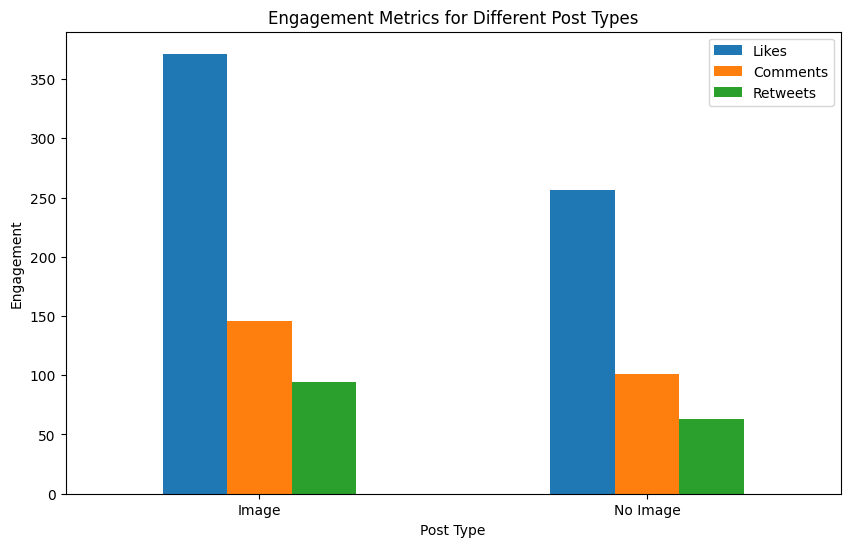

In [7]:
# Average engagement metrics for each post type in the dataset
avg_engagement_modified = df.groupby('Post Type')[['Likes', 'Comments', 'Retweets']].mean()

# Visualization for Hypothesis 2
avg_engagement_modified.plot(kind='bar', figsize=(10, 6))
plt.title("Engagement Metrics for Different Post Types")
plt.xlabel("Post Type")
plt.ylabel("Engagement")
plt.xticks(rotation=0)


## Visualization for Hypothesis 3

This bar graph shows the average number of shares for posts categorized by their sentiment.

"Posts with negative sentiment are associated with a higher number of shares on social media platforms than posts with positive or neutral sentiments."

This hypothesis suggests that the sentiment of a post, specifically negative sentiment, influences the likelihood of it being shared by users. It posits that posts expressing negative sentiments are more likely to be shared than those with positive or neutral sentiments.

(array([0, 1, 2]),
 [Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')])

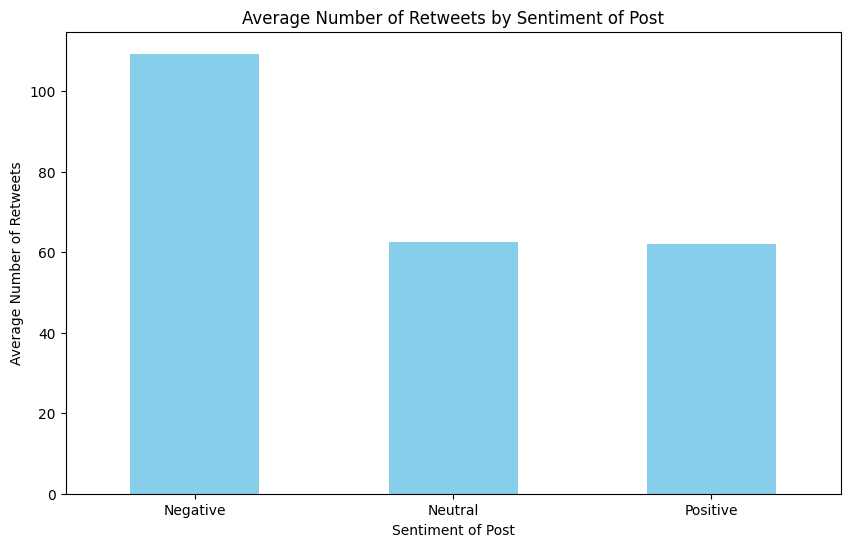

In [8]:
# Average number of shares for each sentiment category in the dataset
avg_shares_by_sentiment_modified = df.groupby('Sentiment of Post')['Retweets'].mean()

# Visualization for Hypothesis 3
avg_shares_by_sentiment_modified.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Average Number of Retweets by Sentiment of Post")
plt.xlabel("Sentiment of Post")
plt.ylabel("Average Number of Retweets")
plt.xticks(rotation=0)


## Visualization for Hypothesis 4

This scatter plot shows the relationship between the frequency of posts and the number of followers.

"There is a positive correlation between the frequency of posts by social media users and their number of followers."

This hypothesis proposes that as the frequency of posts made by a user on a social media platform increases, there will be a corresponding increase in the number of followers that user has. It predicts a direct and positive relationship between these two variables.

Text(0, 0.5, 'Number of Followers')

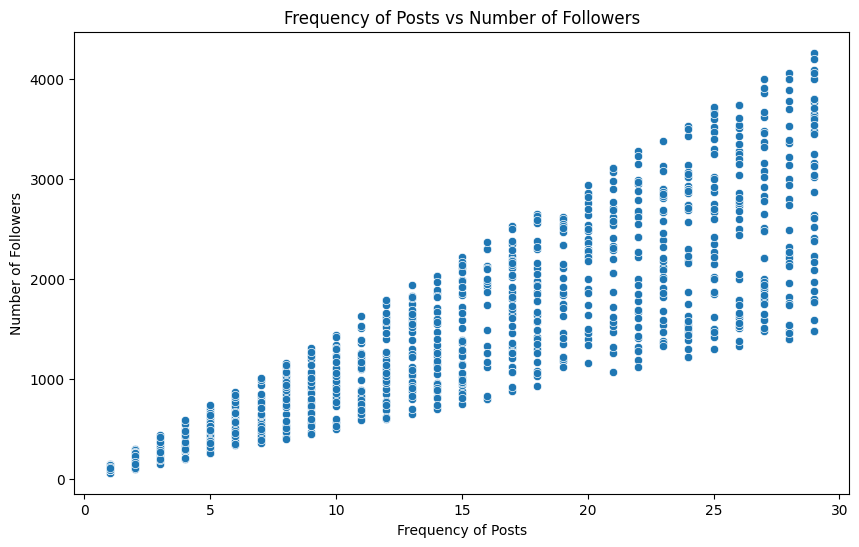

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Frequency of Posts", y="Number of Followers", data=df)
plt.title("Frequency of Posts vs Number of Followers")
plt.xlabel("Frequency of Posts")
plt.ylabel("Number of Followers")
